# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# This allows the display of more than one variable in a cell
# without having to explicitly invoke the display command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Define path and read data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine and display the data as a single DataFrame
merge_df=pd.merge(mouse_metadata,study_results,on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count=merge_df['Mouse ID'].nunique()
merge_df_count=merge_df.count()

print(f'Unique Mice ID Count: {mice_count}\n')
print(f'Values Per Column: \n{merge_df_count}')

Unique Mice ID Count: 249

Values Per Column: 
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mice_ID)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID 
duplicate_mice_df = merge_df.loc[merge_df['Mouse ID'] == 'g989', :]
duplicate_mice_df
# print(f'Values Per Column:')
# duplicate_mice_df.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count=clean_df['Mouse ID'].nunique()
clean_df_count=clean_df.count()

print(f'Unique Mice ID Count: {clean_mice_count}\n')
print(f'Values Per Column: \n{clean_df_count}')

Unique Mice ID Count: 249

Values Per Column: 
Mouse ID              1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
dtype: int64


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summary_df=pd.DataFrame({'Mean Tumor Volume':mean,
                                'Median Tumor Volume':median,
                                'St.Dev Tumor Volume':std,
                                'SEM Tumor Volume':sem})

# Display stats summary dataframe
stats_summary_df.map('{:,.3f}'.format)


,Mean Tumor Volume,Median Tumor Volume,St.Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Capomulin,40.676,41.558,4.995,0.329
Ceftamin,52.591,51.776,6.268,0.470
Infubinol,52.885,51.821,6.567,0.492
Ketapril,55.236,53.699,8.280,0.604
Naftisol,54.332,52.509,8.135,0.596
Placebo,54.034,52.289,7.821,0.581
Propriva,52.458,50.855,6.637,0.540
Ramicane,40.217,40.673,4.846,0.321
Stelasyn,54.233,52.432,7.710,0.573


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg_df = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
stats_summary_agg_df.map('{:,.3f}'.format)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.458  50.855  44.054  6.637  0.540
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

<Axes: title={'center': 'Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

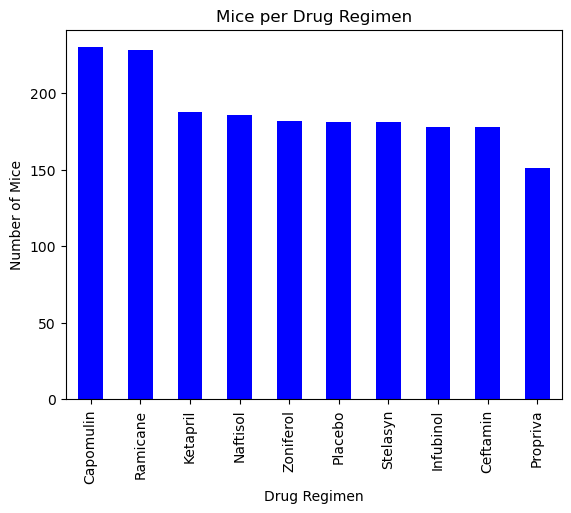

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count number of rows in Drug Regimen
mice_count=clean_df['Drug Regimen'].value_counts()
# regimen_counts

# Format and display bar chart using Pandas
mice_count.plot(kind='bar', color='blue', title='Mice per Drug Regimen', ylabel='Number of Mice')
plt.show()

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Number of Mice Tested per Drug Regimen')

Text(0.5, 0, 'Drug Regimen')

Text(0, 0.5, 'Number of Mice')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

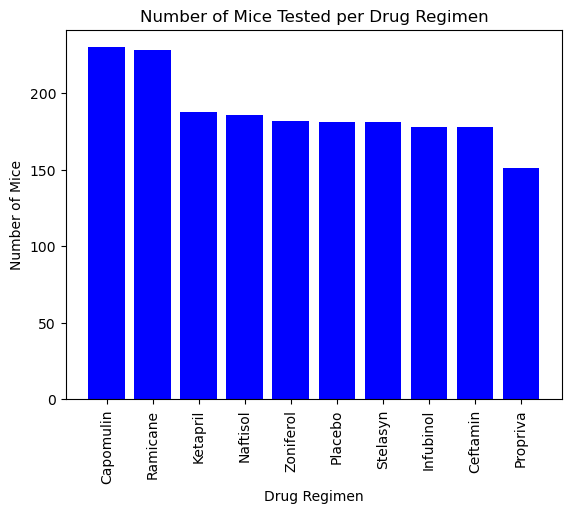

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Set up bar chart using mice_count from above and format using pyplot
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='blue', align='center')
plt.title('Number of Mice Tested per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

<Axes: title={'center': 'Sex Distribution'}, ylabel='count'>

Text(0, 0.5, 'Sex')

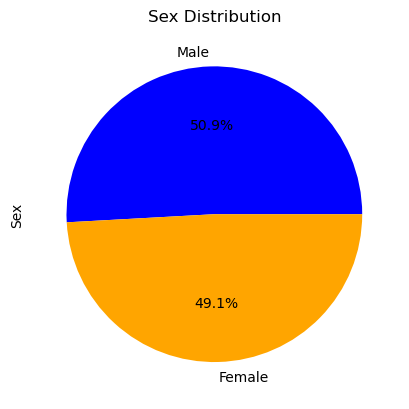

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Store values and colors for each section
sex_mice_count = clean_df['Sex'].value_counts()
colors_pie = ['blue','orange']
# Display chart and add formatting
sex_mice_count.plot(kind='pie', colors=colors_pie, title='Sex Distribution',autopct='%1.1f%%',)
plt.ylabel('Sex')
plt.show()

([<matplotlib.patches.Wedge at 0x264f611da90>,
 [Text(-0.030277540496140426, 1.099583225836728, 'Male'),
  Text(0.030277540496140783, -1.099583225836728, 'Female')],
 [Text(-0.016515022088803868, 0.5997726686382152, '50.9%'),
  Text(0.016515022088804062, -0.5997726686382152, '49.1%')])

Text(0.5, 1.0, 'Sex Distribution')

Text(0, 0.5, 'Sex')

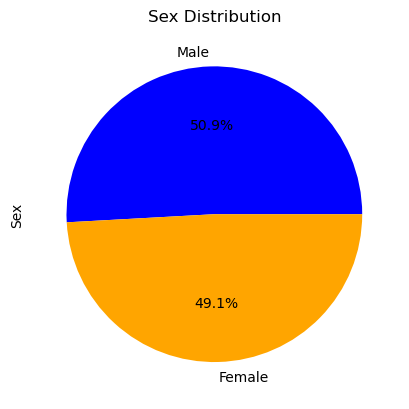

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Store labels for each section
labels_pie=['Male','Female']
# Display chart and add formatting
plt.pie(sex_mice_count, colors=colors_pie, labels=labels_pie, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]
infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]
ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]

# Start by getting the last (greatest) timepoint for each mouse
# Capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol_df = pd.DataFrame(capomulin_last)
#Ramicane
ramicane_last=ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol_df=pd.DataFrame(ramicane_last)
# Infubinol
infubinol_last=infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol_df=pd.DataFrame(infubinol_last)
# ceftamin
ceftamin_last=ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol_df=pd.DataFrame(ceftamin_last)



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge_df = pd.merge(capomulin_vol_df, clean_df, on=('Mouse ID','Timepoint'),how='left')
ramicane_merge_df=pd.merge(ramicane_vol_df,clean_df,on=('Mouse ID','Timepoint'),how='left')
infubinol_merge_df=pd.merge(infubinol_vol_df,clean_df,on=('Mouse ID','Timepoint'),how='left')
ceftamin_merge_df=pd.merge(ceftamin_vol_df,clean_df,on=('Mouse ID','Timepoint'),how='left')

drugs_df=capomulin_vol_df.copy()

# Checks
# capomulin_merge_df.head()
# ramicane_merge_df.head()
# infubinol_merge_df.head()
# ceftamin_merge_df.head()
drugs_df


,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45
i557,45
i738,45
j119,45
j246,35


In [15]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment=0

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = clean_df['Tumor Volume (mm3)']
tumor_vol.tail()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    drugs_df=pd.merge({drug}_vol_df, clean_df, on=('Mouse ID','Timepoint'),how='left')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_vol = clean_df.loc[clean_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    quartiles=tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if treatment == 0:
        print(f"------------------------------------------------------------")
        print(f'{drug}:')
        print(f"The lower quartile is: {lowerq:0,.3f}")
        print(f"The upper quartile is: {upperq:0,.3f}")
        print(f"The interquartile range is: {iqr:0,.3f}")
        print(f"Values below {lower_bound:0,.3f} could be outliers.")
        print(f"Values above {upper_bound:0,.3f} could be outliers.")
        print(f"------------------------------------------------------------")
    treatment+=1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
